# Student Admission Prediction

The original example has been presented by [**Udacity**](https://www.udacity.com/)

The dataset originally came from: [http://www.ats.ucla.edu/](http://www.ats.ucla.edu/)

**Input:**
- GRE scores
- GPA scores
- School class rank (1-4)

**Goal / Output:**
- Prdicting admission to grad school at UCLA

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
# Loading data into a DataFrame

data = pd.read_csv('./data/student_data.csv')
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


# Data exploration

/home/masoud/Softwares/anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


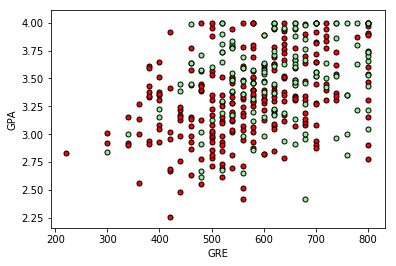

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotPoints(data):
    x = np.array(data[["gre", "gpa"]])
    y = np.array(data[["admit"]])
    
    x_admitted = x[np.argwhere(y==1)]
    x_rejected = x[np.argwhere(y==0)]
    
    plt.scatter([p[0][0] for p in x_rejected], [p[0][1] for p in x_rejected], \
                s = 25, color = 'red', edgecolor='k', label='Rejected')
    
    plt.scatter([p[0][0] for p in x_admitted], [p[0][1] for p in x_admitted], \
                s = 25, color = 'lightgreen', edgecolor='k', label='Admitted')
    
    plt.xlabel('GRE')
    plt.ylabel('GPA')
    #plt.legend()


plotPoints(data)
plt.show()

Text(0.5,1,'Rank 1')

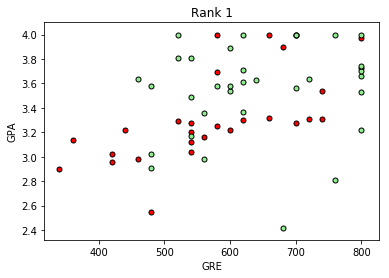

Text(0.5,1,'Rank 2')

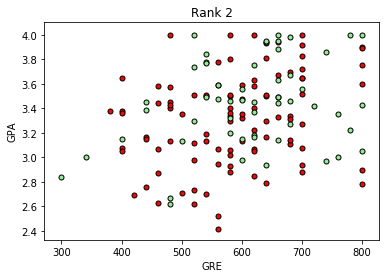

Text(0.5,1,'Rank 3')

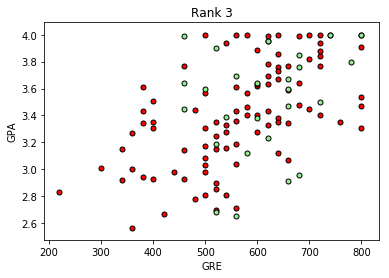

Text(0.5,1,'Rank 4')

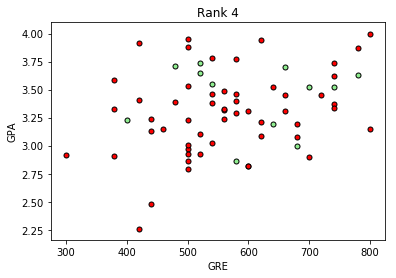

In [5]:
# Let's consider the school rank. It might help to see some meaningful seperation line between rejection and admission
data_rank_1 = data[data['rank'] == 1]
data_rank_2 = data[data['rank'] == 2]
data_rank_3 = data[data['rank'] == 3]
data_rank_4 = data[data['rank'] == 4]

plotPoints(data_rank_1)
plt.title("Rank 1")
plt.show()

plotPoints(data_rank_2)
plt.title("Rank 2")
plt.show()

plotPoints(data_rank_3)
plt.title("Rank 3")
plt.show()

plotPoints(data_rank_4)
plt.title("Rank 4")
plt.show()


## Data preparation

In [6]:
# Features = [gre, gpa, rank_1, rank_2, rank_3, rank_4]

# One-hot encoding the rank
one_hot_rank = pd.get_dummies(data['rank'], prefix='rank')

cleaned_data = pd.concat([data, one_hot_rank], axis=1)

cleaned_data = cleaned_data.drop('rank', axis=1)

print("One-hot encoded data")
cleaned_data.head()


# Scaling data
processed_data = cleaned_data[:]

processed_data['gre'] = processed_data['gre'] / 800.0
processed_data['gpa'] = processed_data['gpa'] / 4.0

print("Normalized data")
processed_data.head()

One-hot encoded data


,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


Normalized data


,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1


## Spliting data into training and testing sets

In [7]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)* 0.9))

train_data = processed_data.iloc[sample]
test_data = processed_data.drop(sample)

print("Number of training samples is: ", len(train_data))
print("Number of test samples is: ", len(test_data))


Number of training samples is:  360
Number of test samples is:  162


## Forming features and targets

In [17]:
import keras

x_train = np.array(train_data.drop('admit', axis=1))
y_train = np.array(keras.utils.to_categorical(train_data['admit'], 2))

x_test = np.array(test_data.drop('admit', axis=1))
y_test = np.array(keras.utils.to_categorical(test_data['admit'], 2))

print(x_test[:4])
print(y_test[:4])
x_train[0].shape[0]

[[0.825  0.9175 0.     0.     1.     0.    ]
 [1.     1.     1.     0.     0.     0.    ]
 [0.65   0.7325 0.     0.     0.     1.    ]
 [0.95   0.75   0.     1.     0.     0.    ]]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


6

## Defining the model

In [76]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import  SGD
from keras.utils import np_utils


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=x_train[0].shape))
model.add(Dropout(0.1))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 128)               896       
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 258       
Total params: 1,154
Trainable params: 1,154
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [77]:
model.fit(x_train, y_train, epochs=2000, batch_size=100, validation_split=0.1, verbose=0)

In [78]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(x_test, y_test)
print("\n Testing Accuracy:", score[1])

360/360 [==============================] - 0s 23us/step

 Training Accuracy: 0.75
162/162 [==============================] - 0s 49us/step

 Testing Accuracy: 0.6234567901234568
